In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [40]:
def train_perceptron(x_inputs : np.array, yd : np.ndarray, learning_rate : float, tol : float, max_epochs : int, control_var : bool):
    dim = list(x_inputs.shape)
    try : 
        n_rows = dim[0] # Número de dados de entrada.
        n_cols = dim[1] # Número de valores dos dados de entrada.
    except Exception as error:
        print(f"The error {error} is happening.")
        if error == "IndexError":
            n_cols = 1
        else:
            sys.exit()
    finally : 
        if control_var == True: # Indicará que terá 1 threshold relacionado.
            w = np.random.uniform(size = n_cols + 1) - 0.5 # Criando o vetor de peso aleatoriamente, ele conterá 1 coluna a mais.
            x_inputs = np.column_stack([x_inputs, -np.ones_like(x_inputs[: , 0])])
        else:
            w = np.random.uniform(size = n_cols) - 0.5 # Criando o vetor de pesos aleatóriamente e não conterá a coluna de pesos a mais.
        n_epochs = 0
        err_epoch = tol + 1
        lst_errors = np.zeros((max_epochs))

        while((n_epochs < max_epochs) and (err_epoch > tol)):
            err_grad = 0
            order_changed = np.random.permutation(n_cols)
            for i in range(n_cols):
                i_rand = order_changed[i]
                x_val = x_inputs[i_rand, : ]
                y_hat = x_val @ w
                err = (yd[i_rand] - y_hat)
                dw = (learning_rate*err*x_inputs[i_rand, :])
                w = w + dw
                err_grad = err_grad + (err * err)
            lst_errors[n_epochs] = err_grad / n_cols
            n_epochs += 1
        return (w, lst_errors)
                
        

In [41]:
#df = pd.read_csv("Iris.csv")

In [42]:
xc1 = np.array([0.3*np.random.randn(60) + 2]).reshape(-1, 2)
xc2 = np.array([0.3*np.random.randn(60) + 4]).reshape(-1, 2)

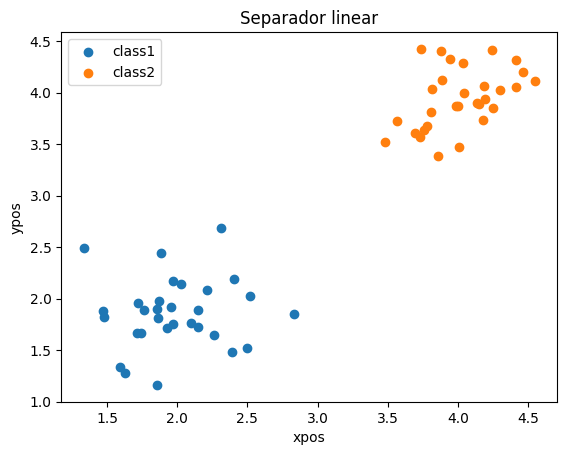

In [43]:
plt.scatter(xc1[:, 0], xc1[:, 1], label = 'class1')
plt.scatter(xc2[:, 0], xc2[:, 1], label = 'class2')
plt.xlabel('xpos')
plt.ylabel('ypos')
plt.title('Separador linear')
plt.legend()

In [44]:
xall = np.concatenate((xc1, xc2), axis = 0)
yall = np.concatenate((np.zeros(len(xc1)), np.ones(len(xc2))))
yall.shape

(60,)

In [45]:
w, error_grad = train_perceptron(xall, yall, 0.1, 0.1, 10000, True)
w

array([-0.00731534, -0.08786255, -0.22884092])

In [46]:
xall_plus = np.column_stack([xall, -np.ones_like(xall[:, 1])])
y_model = 1*((xall_plus @ w) > 0)
y_model

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

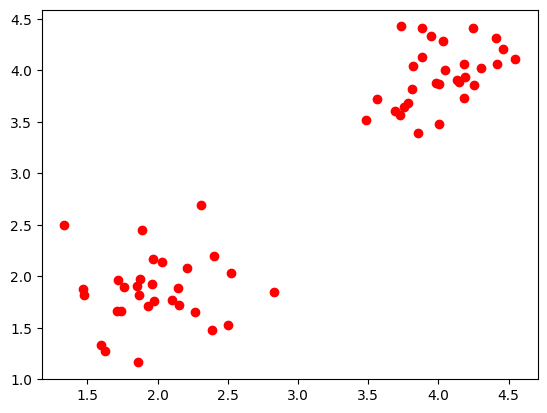

In [50]:
plt.scatter(xall_plus[:, 0], xall_plus[:, 1], color = 'red')

In [ ]:
plt.scatter(xall_plus[:, 0], y_model, color = 'red')